# Example: moon-shaped data using NICE

2020-11-18 first created

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from nice import *
from utils import *
import tensorflow as tf
print(tf.__version__)
!python --version

2.3.1
Python 3.7.6


## Settings

In [2]:
inp_dim = 2
n_sample = 1000
n_couple_layer = 3
n_hid_layer = 3
n_hid_dim = 512
shuffle_type = 'reverse'
n_batch = 128
n_epoch = 2000
n_display = 200

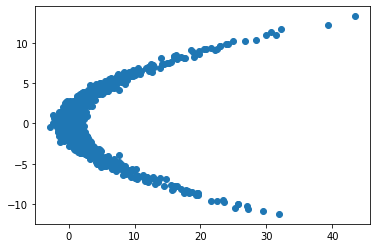

In [3]:
x2 = np.random.normal(0, 4, n_sample)
x1 = np.random.normal(0.25 * x2**2, [1]*n_sample)
X = np.stack([x1, x2], axis=1).astype('float32')
plt.scatter(X[:,0], X[:,1]);

In [4]:
def gen():
    for _ in range(n_sample):
        x2 = np.random.normal(0, 4)
        x1 = np.random.normal(0.25 * x2**2, 1)
        X = np.stack([x1, x2], axis=0).astype('float32')
        yield (X,X)
        
dataset = tf.data.Dataset.from_generator(gen, (tf.float32, tf.float32), output_shapes=(inp_dim, inp_dim))        
dataset = dataset.repeat().shuffle(n_sample).batch(n_batch, drop_remainder=True)
# it = iter(dataset)
# next(it)

## Initialize the model

In [5]:
model = NICE(inp_dim, shuffle_type, n_couple_layer, n_hid_layer, n_hid_dim, name='NICE')
model.build(input_shape=(inp_dim,))
model.summary()

Model: "NICE"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Layer0 (AdditiveCouplingLaye multiple                  526851    
_________________________________________________________________
Layer1 (AdditiveCouplingLaye multiple                  526851    
_________________________________________________________________
Layer2 (AdditiveCouplingLaye multiple                  526851    
_________________________________________________________________
scaling_layer (ScalingLayer) multiple                  2         
Total params: 1,580,555
Trainable params: 1,580,549
Non-trainable params: 6
_________________________________________________________________


In [6]:
def loss_fun(y_true, y_pred):
    # negative log likelihood
    return tf.math.reduce_sum(0.5 * y_pred **2, axis=1)

model.compile(loss=loss_fun, optimizer='adam')

## Train the model

In [7]:
%%time
logger = NBatchLogger(n_display, n_epoch)
hist = model.fit(dataset,
                 epochs=n_epoch,
                 steps_per_epoch=1,
                 callbacks=[logger],
                 verbose=0)

=== Started at 2020-11-19 03h:16m:22s ===
 2020-11-19 03h:16m:24s | Epoch: 1/2000 | loss=7.255194
 2020-11-19 03h:16m:30s | Epoch: 200/2000 | loss=2.453466
 2020-11-19 03h:16m:37s | Epoch: 400/2000 | loss=2.718394
 2020-11-19 03h:16m:43s | Epoch: 600/2000 | loss=2.511651
 2020-11-19 03h:16m:50s | Epoch: 800/2000 | loss=2.502335
 2020-11-19 03h:16m:57s | Epoch: 1000/2000 | loss=2.539415
 2020-11-19 03h:17m:03s | Epoch: 1200/2000 | loss=2.477973
 2020-11-19 03h:17m:10s | Epoch: 1400/2000 | loss=2.298298
 2020-11-19 03h:17m:16s | Epoch: 1600/2000 | loss=2.207129
 2020-11-19 03h:17m:23s | Epoch: 1800/2000 | loss=2.397671
 2020-11-19 03h:17m:29s | Epoch: 2000/2000 | loss=2.402718
=== Time elapsed: 1.1164 min (loss:2.402718) ===
CPU times: user 2min 36s, sys: 11.1 s, total: 2min 48s
Wall time: 1min 6s


## Check results

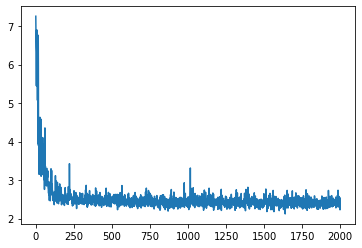

In [8]:
plt.plot(hist.history['loss'])

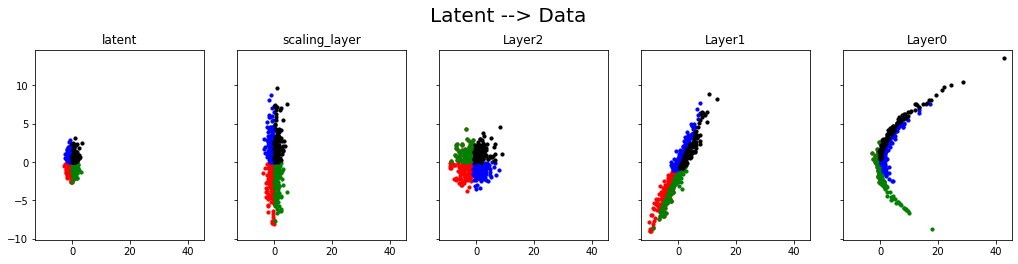

In [9]:
fig = visualize_from_latent(model, 500, title_txt='Latent --> Data', sharexy=True)

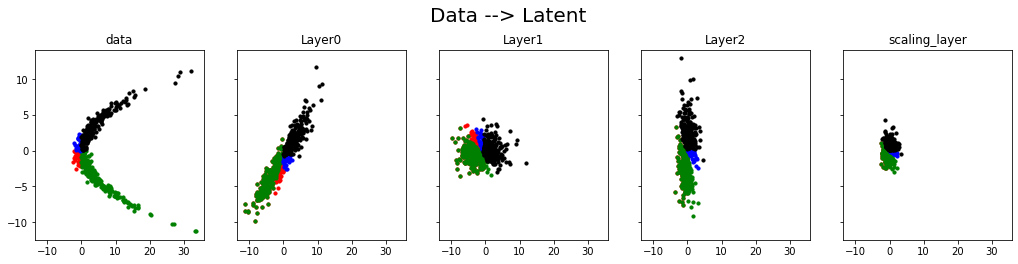

In [10]:
fig = visualize_from_data(model, 500, title_txt='Data --> Latent', sharexy=True)